In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering
from collections import defaultdict
import scipy.cluster.hierarchy as shc

In [2]:
data = pd.read_csv("C:\\Users\\acer\\Downloads\\HCV-Egy-Data.txt")

In [3]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [4]:
data.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [5]:
data.duplicated().sum()

0

### Kmeans Clustering

In [6]:
#calling the object
kmc = KMeans(n_clusters=3)

In [7]:
#fitting data
kmc.fit(data)

KMeans(n_clusters=3)

In [8]:
#check labels
kmc.labels_

array([1, 2, 0, ..., 2, 2, 1])

In [9]:
#creating a data frame for diffrent clusters
clusters = defaultdict(list)
clusters['Kmeans'] = kmc.labels_

In [10]:
#checking inertia
kmc.inertia_

592068436076024.2

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



 Lowest Intertia value is: 16130860.356266938


[]

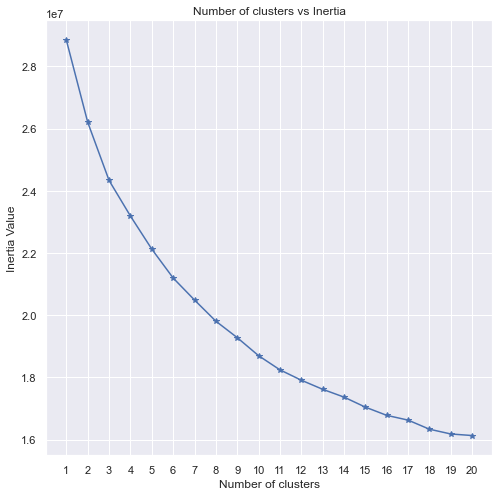

In [11]:
#Trying to find out the best number of clusters
inertia = []
K = [i for i in range(1,21)]
for cluster_number in K:
    kmc1 = KMeans(n_clusters=cluster_number)
    kmc1.fit(data)
    inertia.append(kmc1.inertia_)
inertia1 = np.sqrt(np.array(inertia))
print("\n Lowest Intertia value is: {}".format(inertia1[inertia1.argsort()[0]]))

sns.set_theme()
plt.figure(figsize=(8,8))
plt.plot(K, inertia1, 'b-*')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Value')
plt.title('Number of clusters vs Inertia')
plt.xticks([i for i in range(1,21)])
plt.plot()
    

In [12]:
#choosing the optimum number of clusters as 6
kmc_optimum = KMeans(n_clusters=6)
kmc_optimum.fit(data)
print(*kmc_optimum.labels_)
print(kmc_optimum.inertia_)
clusters['Kmeans_Optimal'] = kmc_optimum.labels_

2 5 1 1 3 2 3 5 2 1 4 3 0 3 4 1 2 1 5 1 3 0 0 1 3 0 4 5 0 5 4 4 5 1 5 4 5 3 0 4 4 5 3 3 4 3 4 3 1 5 1 0 5 5 4 5 2 5 1 4 0 5 4 5 3 5 1 5 1 4 5 3 3 1 5 2 5 1 3 5 5 5 3 1 4 2 4 4 1 3 4 4 0 4 3 2 4 2 0 5 1 1 2 4 2 5 2 0 3 2 0 5 1 4 1 0 2 4 4 4 5 2 4 0 0 0 1 0 5 1 5 1 4 4 5 4 1 3 3 4 0 5 3 0 0 2 3 0 3 3 2 1 1 0 0 3 4 2 1 2 2 3 1 5 0 5 3 4 1 0 0 5 1 2 3 0 5 5 0 2 2 0 3 4 4 3 4 1 1 5 3 5 3 3 3 5 4 1 5 4 1 3 1 1 4 1 5 5 1 4 0 4 5 0 0 3 2 2 5 2 4 0 1 3 2 0 0 0 5 3 0 4 2 3 1 0 4 4 4 3 0 2 2 0 2 1 1 3 1 0 5 1 0 2 5 3 3 0 2 5 4 5 5 1 5 3 4 5 1 4 5 5 5 5 5 4 3 3 5 4 4 5 1 1 4 3 3 3 3 5 3 0 3 5 1 4 5 1 5 5 1 5 0 5 4 1 3 5 1 4 5 5 3 5 1 4 5 5 4 5 5 1 1 0 3 1 5 3 1 3 5 3 4 4 5 4 3 1 5 5 3 4 1 4 5 5 1 1 5 3 5 5 3 3 3 0 3 5 0 2 5 5 2 4 3 3 1 2 3 1 2 0 0 2 0 1 2 2 1 0 2 2 5 4 0 2 0 0 0 0 5 5 4 1 0 1 3 4 1 4 2 2 2 2 2 0 2 1 1 4 3 3 3 2 1 3 3 4 0 4 1 4 0 5 4 2 5 4 0 4 4 0 0 2 2 0 3 4 1 3 2 3 1 3 2 2 0 3 3 5 3 3 0 2 2 2 2 2 2 4 4 3 2 4 3 2 1 1 2 4 3 5 5 3 3 5 1 0 3 4 2 5 1 4 3 5 1 3 1 3 1 1 4 0 5 5 2 3 5 4 

### Hierarchichal Clustering

In [13]:
#fitting the dendogram
result = shc.linkage(data, method='ward')

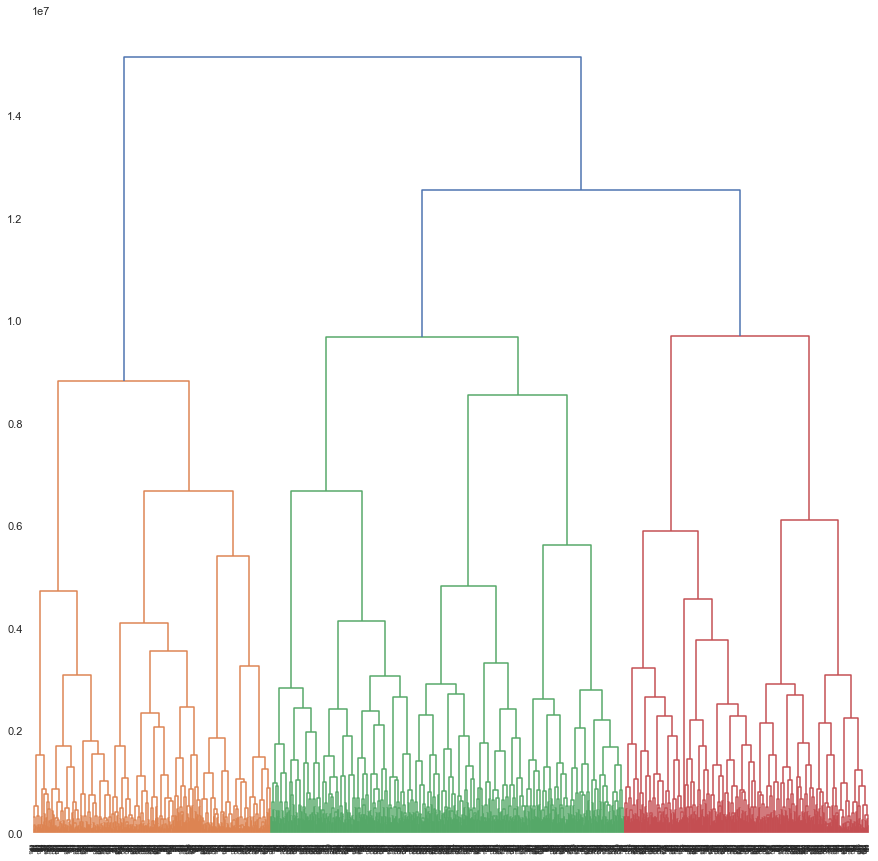

In [14]:
#fitting the dendogram
plt.figure(figsize=(15,15))
shc.dendrogram(result)
plt.xticks(rotation = 90)
plt.show()

In [15]:
#trying for 3 clusters
acl = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
acl.fit(data)

AgglomerativeClustering(n_clusters=3)

In [16]:
acl.labels_

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [17]:
clusters['Hierarchical'] = acl.labels_

In [18]:
#trying for 6 clusters
acl1 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
acl1.fit(data)
print(*acl1.labels_)
clusters['Hierarchical_6_clusters'] = acl1.labels_

1 1 0 0 3 2 3 0 4 0 0 1 2 3 2 4 2 0 0 0 1 4 4 3 3 4 0 4 4 0 2 1 0 0 1 0 1 0 4 0 0 4 3 3 1 1 3 2 3 0 3 4 0 0 1 1 3 1 0 2 4 1 0 1 1 0 3 0 0 2 0 3 1 0 0 2 1 0 3 0 0 0 3 0 2 4 2 0 0 1 2 1 4 2 1 5 2 5 4 4 0 0 5 0 5 0 5 4 1 5 4 1 3 3 2 4 2 1 2 2 0 2 3 4 4 4 0 4 0 3 1 0 1 0 0 3 0 1 1 0 4 1 3 4 4 4 3 4 1 1 5 0 3 4 5 0 3 5 0 2 2 3 4 0 4 0 0 3 0 4 4 0 0 5 4 4 1 1 4 5 2 4 3 2 1 1 0 0 3 0 3 0 1 3 1 0 0 0 1 0 3 3 3 0 1 3 0 4 0 2 4 0 1 4 4 3 1 5 0 5 0 4 3 3 5 4 4 4 1 1 2 1 5 2 0 4 1 2 1 3 4 2 5 4 5 3 3 3 3 0 0 0 4 5 1 1 1 4 5 0 1 0 0 0 0 1 0 1 3 2 0 1 0 0 1 3 0 3 0 0 0 1 0 3 2 3 1 3 3 0 1 4 3 0 0 0 0 0 0 1 3 0 4 0 1 2 1 0 3 2 0 0 0 1 0 2 1 0 2 1 1 3 0 4 3 4 1 0 0 1 1 3 1 1 1 0 3 0 0 1 1 0 3 0 1 0 3 3 1 3 0 0 4 0 1 0 1 0 4 4 0 0 5 2 1 3 4 5 0 3 5 4 0 5 4 3 5 5 3 4 2 5 0 0 4 5 4 4 4 5 0 0 2 3 4 3 1 2 3 4 5 5 5 5 5 4 5 3 0 2 1 1 3 2 4 2 3 2 4 2 3 2 4 0 2 5 1 2 4 1 2 4 4 5 2 4 3 0 4 3 5 0 4 1 1 4 4 3 0 0 0 0 4 5 4 5 5 5 5 3 2 3 5 0 2 5 4 4 5 0 3 0 0 3 1 0 3 4 1 2 1 0 0 2 2 0 4 0 3 3 0 2 2 4 1 1 3 4 1 0 

### Affinity Propogation Clustering

In [19]:
#find out clusters itself
afp = AffinityPropagation(random_state=0)
afp.fit(data)

AffinityPropagation(random_state=0)

In [20]:
clusters['AffinityPropogation'] = afp.labels_

In [21]:
print(*afp.labels_)

15 57 9 6 0 30 2 24 59 48 41 36 53 75 54 61 30 34 72 50 28 47 68 51 37 47 60 61 23 8 30 41 3 34 65 39 65 42 44 41 39 17 70 2 52 57 71 54 20 40 26 55 17 65 10 10 70 24 31 54 23 5 41 7 28 73 64 31 69 71 31 26 70 50 8 30 1 6 38 17 8 40 2 67 22 59 54 39 8 28 19 7 55 54 14 18 60 36 46 25 8 31 21 31 18 62 45 25 14 45 55 31 35 56 35 53 27 28 52 22 1 30 39 68 55 46 6 25 3 47 7 67 4 41 34 24 6 74 28 50 49 5 58 68 68 59 70 15 14 57 15 13 13 53 46 65 71 32 6 66 66 70 59 61 16 9 69 26 34 44 53 8 34 15 45 23 7 10 16 15 27 23 2 54 52 36 12 34 75 67 26 40 37 58 72 41 41 31 1 43 11 37 51 48 41 51 73 55 6 35 44 12 7 44 23 70 21 21 40 32 40 68 11 2 32 53 53 53 5 14 53 24 21 20 31 49 31 27 4 38 55 66 18 23 21 26 51 70 20 68 65 67 23 18 5 36 14 46 45 34 71 17 43 29 42 10 12 10 26 52 8 65 3 73 65 60 9 42 34 65 39 10 67 11 27 2 36 2 2 3 10 61 70 8 8 39 65 67 73 7 13 1 47 31 24 11 28 62 11 22 69 41 57 17 11 33 1 31 52 8 3 26 31 61 26 64 3 58 50 28 1 45 4 74 10 12 75 8 69 17 36 39 13 50 1 73 13 13 5 38 8 8 42

### Clustering Data analysis

In [22]:
clusters

defaultdict(list,
            {'Kmeans': array([1, 2, 0, ..., 2, 2, 1]),
             'Kmeans_Optimal': array([2, 5, 1, ..., 4, 5, 4]),
             'Hierarchical': array([2, 2, 2, ..., 2, 2, 0], dtype=int64),
             'Hierarchical_6_clusters': array([1, 1, 0, ..., 0, 1, 2], dtype=int64),
             'AffinityPropogation': array([15, 57,  9, ..., 41,  5, 53], dtype=int64)})

In [23]:
clusters = pd.DataFrame(clusters)

In [24]:
clusters.head()

,Kmeans,Kmeans_Optimal,Hierarchical,Hierarchical_6_clusters,AffinityPropogation
0,1,2,2,1,15
1,2,5,2,1,57
2,0,1,2,0,9
3,2,1,2,0,6
4,0,3,0,3,0


In [37]:
def count_plot(column_name, size = (6,6)):
    df = pd.DataFrame(clusters[column_name].apply(str))
    plt.figure(figsize = size)
    sns.countplot(df[column_name])
    plt.xlabel('Number of clusters')
    plt.ylabel('Number of data points')
    plt.title('Number of clusters and their count')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


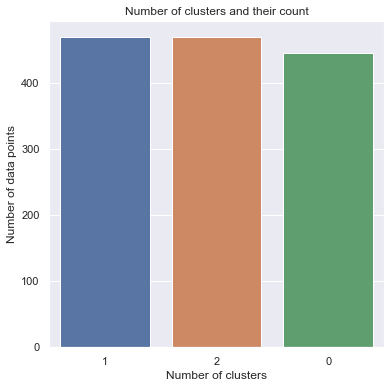

In [38]:
count_plot('Kmeans')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-p

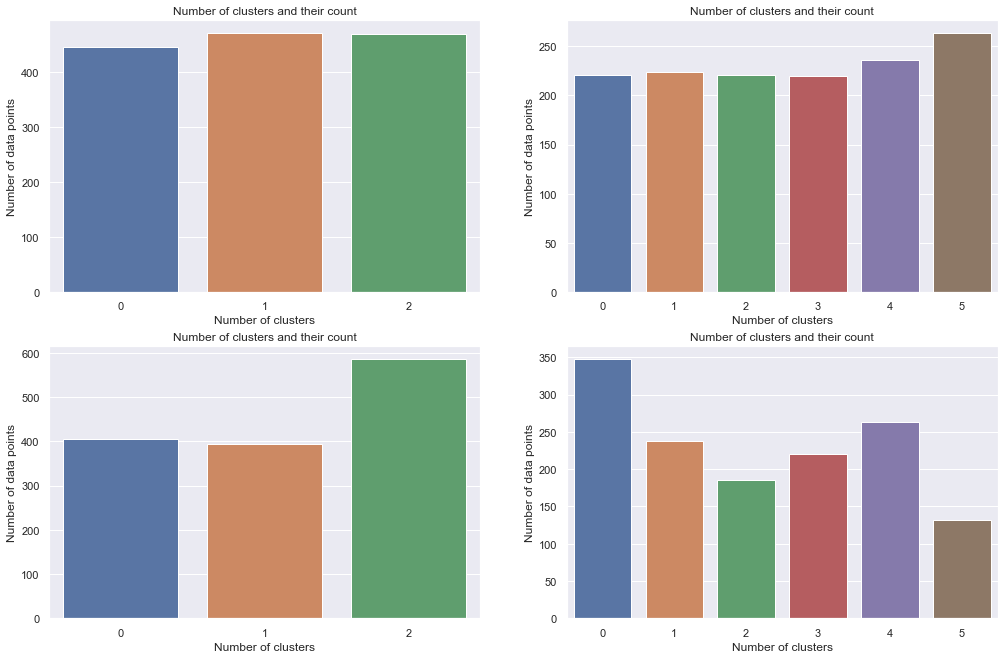

In [57]:
plt.figure(figsize = (17,17))
for index, column in enumerate(clusters.columns):
    if (index == 4):
        break
    plt.subplot(3,2, index+1)
    sns.countplot(clusters[column])
    plt.xlabel('Number of clusters')
    plt.ylabel('Number of data points')
    plt.title('Number of clusters and their count')
plt.show();

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


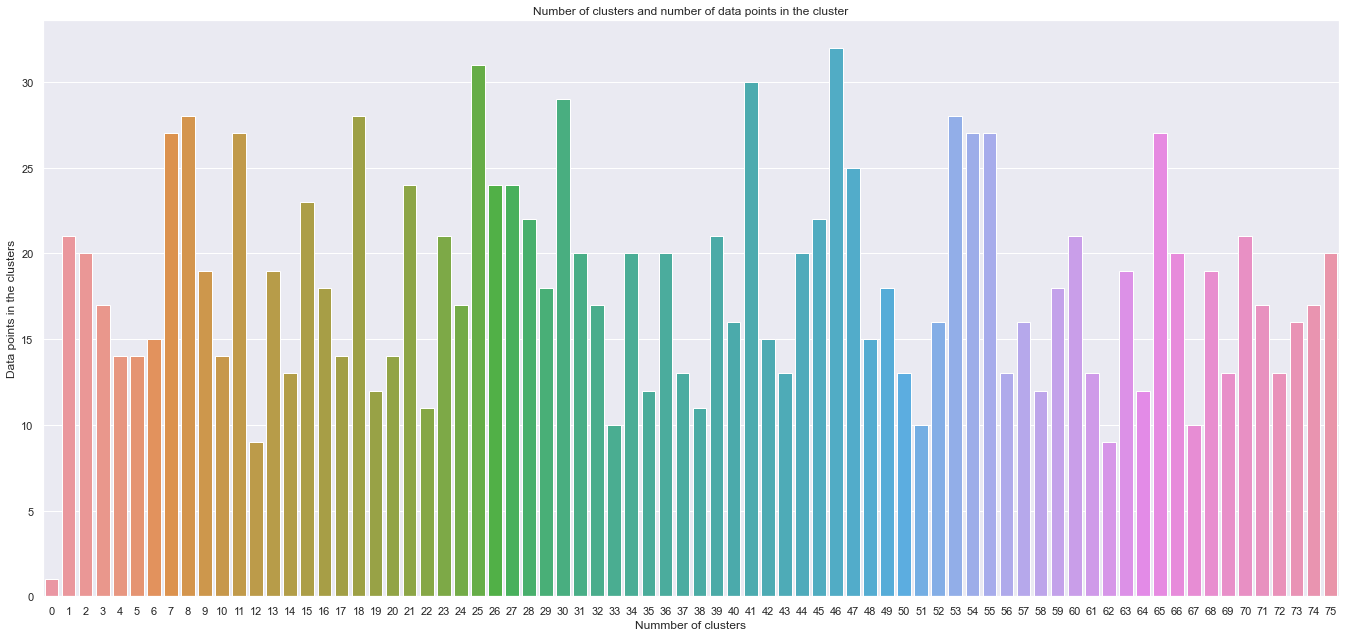

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
sns.countplot(clusters['AffinityPropogation'], ax= ax)
ax.set_xlabel('Nummber of clusters')
ax.set_ylabel('Data points in the clusters')
ax.set_title('Number of clusters and number of data points in the cluster');